<a href="https://colab.research.google.com/github/roopareddyb/employee-salary-prediction/blob/main/employee_salary_prediction_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv("adult 3.csv")
data.head()

Saving adult 3.csv to adult 3.csv


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.shape

(48842, 15)

In [5]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [7]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [8]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [9]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [10]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [11]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [12]:
data.occupation.replace({'?':'Others'}, inplace=True)

/tmp/ipython-input-12-2546866885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'}, inplace=True)


In [13]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [14]:
data.workclass.replace({'?':'Not Listed'}, inplace=True)

/tmp/ipython-input-14-2246085280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Not Listed'}, inplace=True)


In [15]:
data = data[data['workclass']!='Never-worked']
data = data[data['workclass']!='Without-pay']

In [16]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Not Listed           2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [17]:
data = data[data['education']!='Preschool']
data = data[data['education']!='5th-6th']
data = data[data['education']!='1st-4th']

In [18]:
print(data['education'].value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


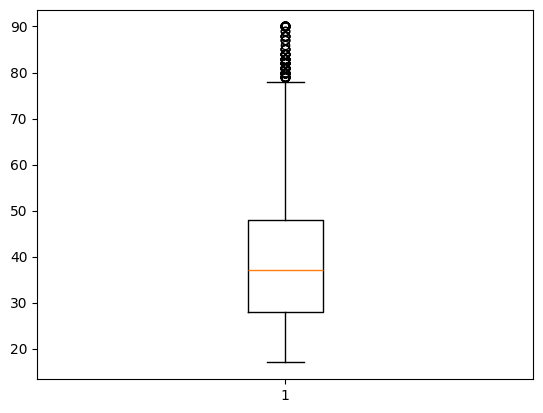

In [19]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [20]:
data = data[(data['age']<=75)&(data['age']>=17)]

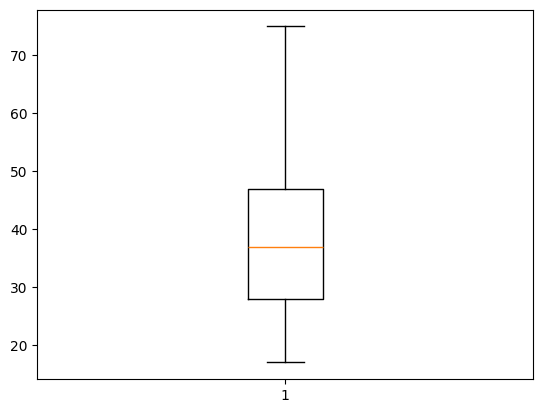

In [21]:
plt.boxplot(data['age'])
plt.show()

In [22]:
#redundancy
data.drop(columns=['education'], inplace = True)

In [23]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Separate encoders for each column
encoders = {}

for col in ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
    joblib.dump(le, f'{col}_encoder.pkl')  # Save each encoder


In [24]:
x=data.drop(columns=['income']) #input
y=data['income'] #output
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [25]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode y
le = LabelEncoder()
y = le.fit_transform(y)  # Now '>50K' → 1, '<=50K' → 0

In [27]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib

# 1. Split your labeled data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Container to store accuracy and models
model_scores = {}

# ---------------------------
# 2. Model 1: Baseline XGBoost
# ---------------------------
xgb1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb1.fit(x_train, y_train)
y_pred1 = xgb1.predict(x_test)
acc1 = accuracy_score(y_test, y_pred1)
model_scores['baseline'] = (acc1, xgb1)
print("Model: Baseline")
print("Accuracy:", acc1)
print(classification_report(y_test, y_pred1))


# --------------------------------------
# 3. Model 2: XGBoost with scale_pos_weight
# --------------------------------------
neg, pos = np.bincount(y_train)
scale = neg / pos
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale)
xgb2.fit(x_train, y_train)
y_pred2 = xgb2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2)
model_scores['scale_pos_weight'] = (acc2, xgb2)
print("Model: scale_pos_weight")
print("Accuracy:", acc2)
print(classification_report(y_test, y_pred2))


# --------------------------
# 4. Model 3: SMOTE + XGBoost
# --------------------------
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_train, y_train)
xgb3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb3.fit(x_res, y_res)
y_pred3 = xgb3.predict(x_test)
acc3 = accuracy_score(y_test, y_pred3)
model_scores['smote'] = (acc3, xgb3)
print("Model: SMOTE")
print("Accuracy:", acc3)
print(classification_report(y_test, y_pred3))


# --------------------------
# 5. Save the best model
# --------------------------
best_model_name = max(model_scores, key=lambda k: model_scores[k][0])
best_model = model_scores[best_model_name][1]
joblib.dump(best_model, f"best_model_{best_model_name}.joblib")

print(f"\n✅ Best model: {best_model_name} saved as best_model_{best_model_name}.joblib")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:30:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: Baseline
Accuracy: 0.878517429651407
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7277
           1       0.78      0.68      0.72      2247

    accuracy                           0.88      9524
   macro avg       0.84      0.81      0.82      9524
weighted avg       0.87      0.88      0.88      9524



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:30:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: scale_pos_weight
Accuracy: 0.8426081478370433
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7277
           1       0.62      0.86      0.72      2247

    accuracy                           0.84      9524
   macro avg       0.79      0.85      0.81      9524
weighted avg       0.87      0.84      0.85      9524



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:30:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: SMOTE
Accuracy: 0.8576228475430492
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      7277
           1       0.68      0.76      0.71      2247

    accuracy                           0.86      9524
   macro avg       0.80      0.82      0.81      9524
weighted avg       0.86      0.86      0.86      9524


✅ Best model: baseline saved as best_model_baseline.joblib


In [28]:
import joblib

# Save the model
joblib.dump(best_model, 'salary_predictor_model.pkl')
print("Saved best model as salary_predictor_model.pkl")


Saved best model as salary_predictor_model.pkl


In [29]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 522.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [30]:
!ngrok config add-authtoken 30DR0nRisiWyUF5tRi0D8yWmmoA_7Fjhkis2nzofqi9YH8xiB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [55]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model and encoders
model = joblib.load("salary_predictor_model.pkl")
occupation_encoder = joblib.load("occupation_encoder.pkl")

# Streamlit page configuration
st.set_page_config(page_title="Employee Salary Prediction using XGBoost", page_icon="💼", layout="wide")

# Apply custom theme using markdown
custom_css = """
<style>
    body {
        background-color: #f0f2f6;
        color: #1c1c1c;
    }
    .stSlider > div {
        color: #003366;
    }
    .stButton button {
        background-color: #003366;
        color: white;
        font-weight: bold;
        padding: 10px 24px;
        border-radius: 8px;
        font-size: 18px;
    }
    .stButton button:hover {
        background-color: #0055aa;
        color: #ffffff;
    }
</style>
"""
st.markdown(custom_css, unsafe_allow_html=True)

# Header with styling
st.markdown("<h1 style='text-align: center; color: #FA8072;'>Employee Salary Prediction using XGBoost</h1>", unsafe_allow_html=True)
st.markdown("<p style='text-align: center; font-size: 16px;'>Predict whether an employee earns >50K or ≤50K based on job and background details.</p>", unsafe_allow_html=True)

# --- User Input Section ---
st.markdown("---")
st.markdown("### 📋 Input Employee Details")

# Sliders in a row
col1, col2, col3 = st.columns(3)
with col1:
    age = st.slider("👤 Age", 18, 65, 30)
with col2:
    hours_per_week = st.slider("⏱ Hours per week", 1, 80, 40)
with col3:
    experience = st.slider("📆 Years of Experience", 0, 40, 5)

# Dropdowns below sliders
education = st.selectbox("🎓 Education Level", [
    "Bachelors", "HS-grad", "Some-college", "Masters", "Assoc", "PhD"
])
occupation = st.selectbox("💼 Job Role", occupation_encoder.classes_)

# Encode education
education_encoder = LabelEncoder()
education_encoder.fit(["Bachelors", "HS-grad", "Some-college", "Masters", "Assoc", "PhD"])
encoded_education = education_encoder.transform([education])[0]

# Encode occupation
occupation_encoded = occupation_encoder.transform([occupation])[0]

# Display readable input preview
st.markdown("### Review Input")
readable_input = pd.DataFrame({
    'Age': [age],
    'Education': [education],
    'Occupation': [occupation],
    'Hours/Week': [hours_per_week],
    'Experience': [experience]
})
st.dataframe(readable_input, use_container_width=True)

# Build final input
default_features = {
    'workclass': 0,
    'fnlwgt': 150000,
    'marital-status': 0,
    'relationship': 0,
    'race': 0,
    'gender': 0,
    'capital-gain': 0,
    'capital-loss': 0,
    'native-country': 0
}
input_data = {
    'age': age,
    'workclass': default_features['workclass'],
    'fnlwgt': default_features['fnlwgt'],
    'educational-num': encoded_education,
    'marital-status': default_features['marital-status'],
    'occupation': occupation_encoded,
    'relationship': default_features['relationship'],
    'race': default_features['race'],
    'gender': default_features['gender'],
    'capital-gain': default_features['capital-gain'],
    'capital-loss': default_features['capital-loss'],
    'hours-per-week': hours_per_week,
    'native-country': default_features['native-country']
}
input_df = pd.DataFrame([input_data])

# Predict salary
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    result = ">50K" if prediction[0] == 1 else "≤50K"
    st.success(f"✅ Prediction: {result}", icon="📊")

# --- Batch Prediction Section ---
st.markdown("---")
st.markdown("### 📂 Batch CSV Prediction")

uploaded_file = st.file_uploader("Upload a CSV file with employee data", type="csv")
if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)

    # Encode batch data
    batch_data['education'] = education_encoder.transform(batch_data['education'])
    batch_data['occupation'] = occupation_encoder.transform(batch_data['occupation'])
    batch_data['workclass'] = default_features['workclass']
    batch_data['fnlwgt'] = default_features['fnlwgt']
    batch_data['marital-status'] = default_features['marital-status']
    batch_data.rename(columns={'education': 'educational-num'}, inplace=True)
    batch_data['relationship'] = default_features['relationship']
    batch_data['race'] = default_features['race']
    batch_data['gender'] = default_features['gender']
    batch_data['capital-gain'] = default_features['capital-gain']
    batch_data['capital-loss'] = default_features['capital-loss']
    batch_data['native-country'] = default_features['native-country']

    if 'experience' in batch_data.columns:
        batch_data.drop(columns=['experience'], inplace=True)

    st.markdown("#### 📄 Preview of Uploaded Data (Encoded):")
    st.dataframe(batch_data.head(), use_container_width=True)

    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = ['>50K' if pred == 1 else '≤50K' for pred in batch_preds]

    st.markdown("#### ✅ Batch Prediction Results:")
    st.dataframe(batch_data[['educational-num', 'occupation', 'hours-per-week', 'PredictedClass']].head(), use_container_width=True)

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("📥 Download Predictions", csv, file_name='predicted_classes.csv', mime='text/csv')


Overwriting app.py


In [56]:
import os
import threading
def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')
thread = threading.Thread(target=run_streamlit)
thread.start()

In [57]:
from pyngrok import ngrok
import time

# Optional: Kill any existing tunnels first
ngrok.kill()

# Wait a bit for the app to start
time.sleep(5)

# Open tunnel to port 8501
public_url = ngrok.connect(8501)
print("🚀 Your Streamlit app is live here:", public_url)

🚀 Your Streamlit app is live here: NgrokTunnel: "https://afa5070aa31a.ngrok-free.app" -> "http://localhost:8501"
